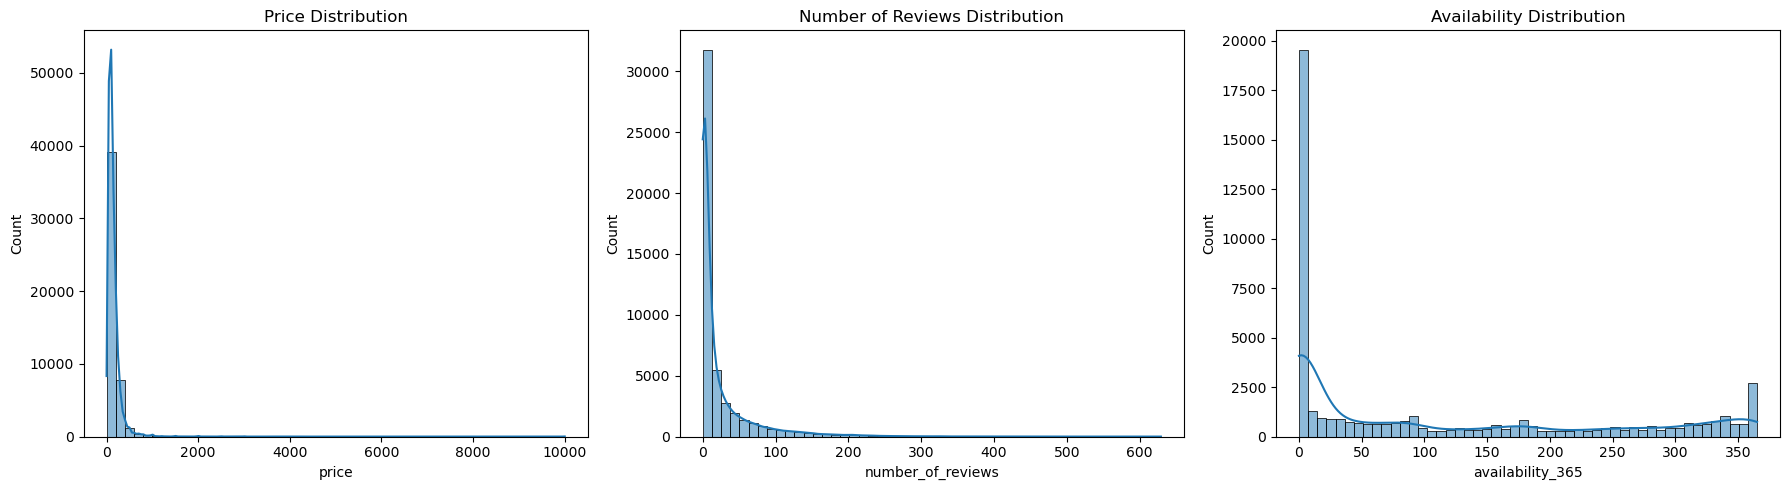

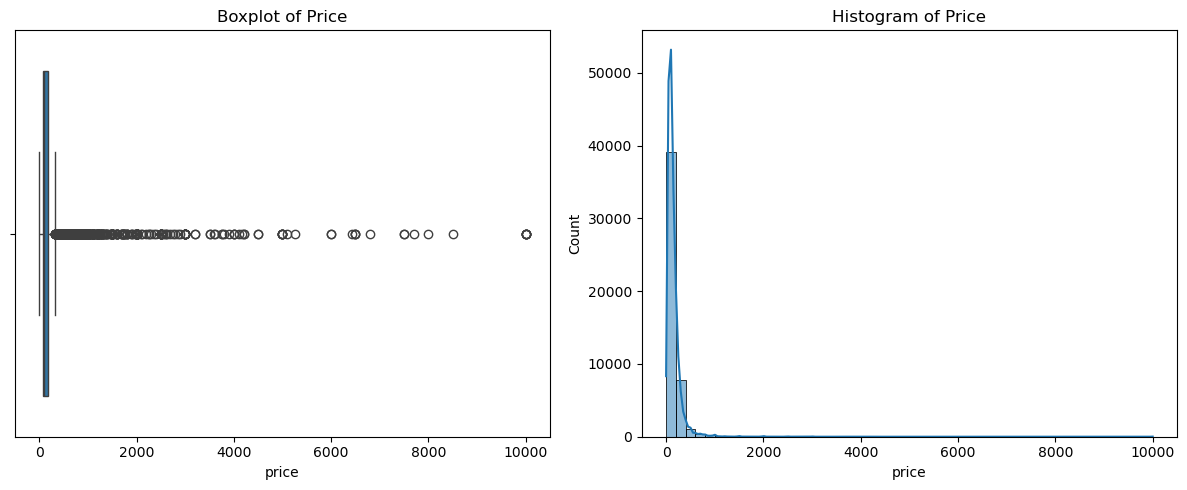

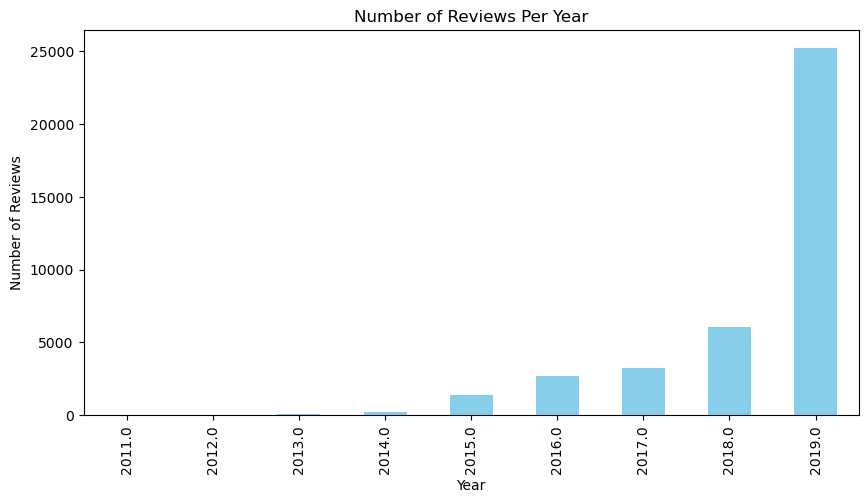

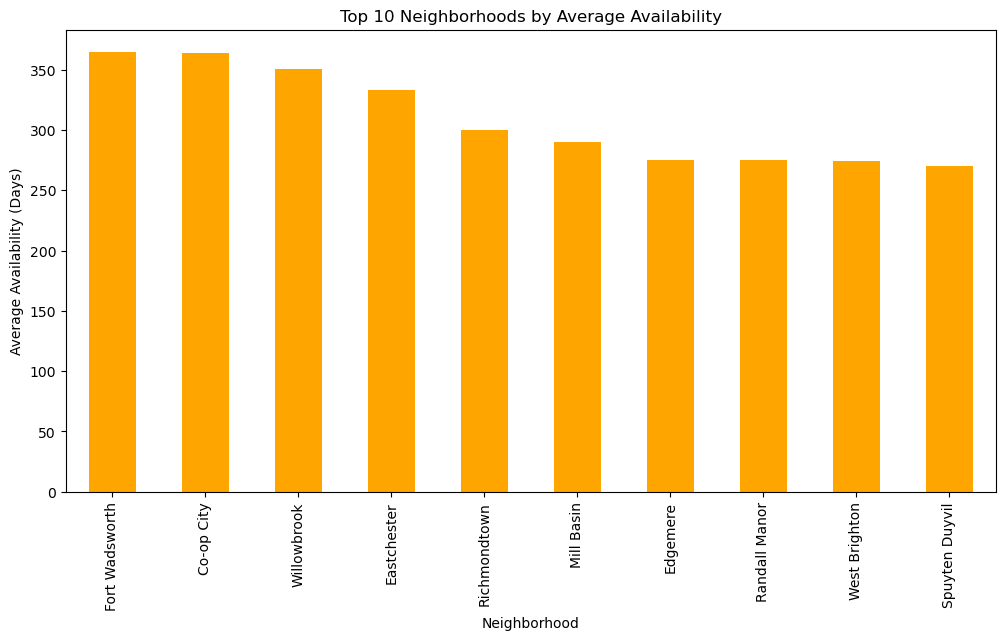

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'AB_NYC_2019.csv'
df = pd.read_csv(file_path)

# Task 1: Data Exploration and Summary
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Visualize distributions of key variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['price'], bins=50, ax=axes[0], kde=True).set(title='Price Distribution')
sns.histplot(df['number_of_reviews'], bins=50, ax=axes[1], kde=True).set(title='Number of Reviews Distribution')
sns.histplot(df['availability_365'], bins=50, ax=axes[2], kde=True).set(title='Availability Distribution')
plt.tight_layout()
plt.show()

# Task 2: Data Cleaning
# Identify missing values
missing_values = df.isnull().sum()

# Drop duplicates
duplicates_count = df.duplicated().sum()
df = df.drop_duplicates()

# Task 3: Categorical Data Processing
# Distribution of neighborhood and room type
room_type_dist = df['room_type'].value_counts()
neighborhood_group_dist = df['neighbourhood_group'].value_counts()

# Encoding categorical variables: One-hot encode room type
df_encoded = pd.get_dummies(df, columns=['room_type'], drop_first=True)

# Task 4: Outlier Detection and Handling (Price)
# Visualize outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=df, x='price', ax=axes[0]).set(title='Boxplot of Price')
sns.histplot(df['price'], bins=50, ax=axes[1], kde=True).set(title='Histogram of Price')
plt.tight_layout()
plt.show()

# Outlier Detection (IQR Method)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on IQR
df_outliers_removed = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Task 5: Date Transformation
# Parse 'last_review' to datetime and extract year
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['last_review_year'] = df['last_review'].dt.year

# Visualize reviews per year
reviews_per_year = df['last_review_year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
reviews_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Reviews Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

# Task 6: Advanced Analysis - Areas with highest availability
availability_by_neighborhood = df.groupby('neighbourhood')['availability_365'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
availability_by_neighborhood.plot(kind='bar', color='orange')
plt.title('Top 10 Neighborhoods by Average Availability')
plt.xlabel('Neighborhood')
plt.ylabel('Average Availability (Days)')
plt.show()
